# Hessian-Vector products


### The Hessian-vector product

Computing the Hessian, $H$  analitically is annoying and estimating it is computationaly expensive. However estimating its product with another vector $Hv$ is much simpler.  

$$\nabla_{\mathbf{x}} f(\mathbf{x} + \Delta \mathbf{x}) = \nabla_{\mathbf{x}}f(\mathbf{x}) + H(\mathbf{x})\Delta \mathbf{x} +  O(|| \Delta{\mathbf{x}} ||^2) $$
we let $\Delta \mathbf{x} = r\mathbf{v}$, where $\mathbf{v}$ is an arbitrary vector and $r$ is a small number.

$$\nabla_{\mathbf{x}} f(\mathbf{x} +  r\mathbf{v}) = \nabla_{\mathbf{x}}f(\mathbf{x}) + r\,H(\mathbf{x})\mathbf{v} +  O(r^2) $$

$$r\,H(\mathbf{x})\mathbf{v}  = \nabla_{\mathbf{x}} f(\mathbf{x} +  r\mathbf{v}) -\nabla_{\mathbf{x}}f(\mathbf{x}) +  O(r^2) $$

$$H(\mathbf{x})\mathbf{v}  = \frac{\nabla_{\mathbf{x}} f(\mathbf{x} +  r\mathbf{v}) -\nabla_{\mathbf{x}}f(\mathbf{x})}{r} +  O(r) $$

For clarity lets let $g(\mathbf{x}) = \nabla_{\mathbf{x}}f(\mathbf{x})$:

$$H(\mathbf{x})\mathbf{v}  = \frac{ g(\mathbf{x} +  r\mathbf{v}) - g(\mathbf{x})}{r} +  O( r) $$


We can see from the last equation that $H(\mathbf{x})\mathbf{v}$ can be estimated from a finite difference and the gradient of the function $f$. This an estimation and it error is $O(r)$. To get a small estimation error, $r$, must become small which causes the above formula to be succeptible to numeric and roundoff problems, (see [Barak A. Pearlmutter](http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=88ADBBDB4FE4BA1966C02D130DB195E4?doi=10.1.1.29.6143&rep=rep1&type=pdf) ). 

To get a more stable estimate one should use:

$$H(\mathbf{x})\mathbf{v} \approx \frac{ g(\mathbf{x} +  r\mathbf{v}) - g(\mathbf{x} - r\mathbf{v)}}{2r} $$


### The Inverse Hessian-vector product

Often it is necessary to compute $H^{-1}\mathbf{v}$ (a key step in Newton's method). This can be achieved by minimizing:

$$\min_{\mathbf{x}} ||H\mathbf{x} - \mathbf{v}||^2$$

using conjugate-gradient methods as the solution is $\mathbf{x} =H^{-1}\mathbf{v}$. If $H$ is known to be positive definite, one can instead minimize:

$$\min_{\mathbf{x}}  \frac{1}{2}\mathbf{x}^{T}H\mathbf{x} + \mathbf{x}\,\mathbf{b}$$

which does not square the condition number.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Simple quadratic function with first and second derivative

In [51]:
def f(x):
    return x[0, :]**2 + x[1, :]**2

def df(x):
    return np.array([2.0*x[0, :], 2.0*x[1, :]])

def ddf(x):
    return np.array([[2.0, 0], [0., 2.0]])
        

In [45]:
def get_data_to_plot(f):
    p = np.linspace(-10,10, 100)
    X, Y = np.meshgrid(p, p)
    x = np.array([X.flatten(), Y.flatten()])
    z = f(x)
    Z = z.reshape(X.shape)
    return X, Y, Z

def get_vector_field_to_plot(df):
    p = np.linspace(-10,10, 10)
    X, Y = np.meshgrid(p, p)
    x = np.array([X.flatten(), Y.flatten()])
    z = df(x)
    U = z[0, :].reshape(X.shape)
    V = z[1, :].reshape(X.shape)
    return X, Y, U, V
    

### Plot of function, and first derivative

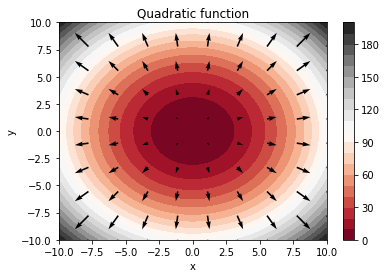

In [48]:

X, Y, Z = get_data_to_plot(f)
Xq, Yq, U, V = get_vector_field_to_plot(df)

plt.figure()
plt.title('Quadratic function')

plt.contourf(X, Y, Z, 20,  cmap='RdGy');
plt.colorbar();
plt.quiver(Xq, Yq, U, V)

plt.axis(aspect='image');
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [ ]:
### Estimating the Hessian 